## Материалы
* .[Презентация](https://disk.yandex.ru/i/Mgh7NB6O9HVpOw)
* .[Дашборд](https://public.tableau.com/views/_16430422974540/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link)

# Исследование поведения пользователей 

## Вводные данные

Поступило задание выделить группы пользователей, которые отличаются по метрикам. Задание поступило от менеджмента мобильного приложения "Ненужные вещи". По результатам встречи аналитической группы, задача была конкретизирована как задача по выделению групп пользователей на основе поведения (по заданным нам метрикам) и определить, какие действия чаще совершают те пользователи, которые просматривают контакты в мобильном приложении. Нам необходимо понять, какие пользователи у нас есть в приложении и каким образом мы можем повлиять на увеличение конверсии в целевое событие.

### Цель исследования

1. Понять поведение пользователей, оценить ключевые характеристики аудитории и лучше работать с аудиторией приложения.
2. Проверить статистические гипотезы о поведении пользователей 

### Планы исследования

**1. Предобработка данных**

- загрузить данные
- оценить общую информацию о данных
- проверить пропуски и дубликаты данных
- свести наименования столбцов к унифицированному виду
- поменять формат данных столбца даты
- сделаем промежуточные выводы

**2. Исследовательский анализ данных** 

- ввести вспомогательные столбцы времени, для дальнейшего анализа (добавить столбцы по дням)
- свести данные с двух датасетов в один
- проверить, нет ли выбросов по дате события или каких-то несовпадений с пользователями. Разрешить коллизии, если они обнаружатся.
- сделаем промежуточные выводы

  **Retention Rate**
- Разделим пользователей на понедельные когорты по первому посещению. Если пользователи не проявляют активности в следующую неделю, то мы считаем что они отсеялись. Рассчитаем общий Retention Rate.
- Выделим пользователей, которые минимум единожды просматривали контакты, в отдельную группу. Рассчитаем Retention Rate для каждой из наших групп.Я предполагаю, что те кто просматривают контакты больше времени посещают сайт.
- сделаем промежуточные выводы

  **Время в приложении**
- Исследуем время проведеное в приложении. Под временем проведенном в приложении мы берем время первого и последнего события в день. Проверим есть ли разница во времени проведения на сайте между выделенными группами.
- сделаем промежуточные выводы

  **Частота действий пользователей**
- Проверим частоту действий пользователей, Нас интересует сколько действий в день делает пользователь. Проверим, есть ли разница в наших выделенных группах. Также посчитаем в принцпе оценку пользовательской активности (DAU и WAU)
- сделаем промежуточные выводы

  **Конверсия**
- Посмотрим конверсию в целевое действие (просмотр контактов) и посмотрим, есть ли разница для целевой группы.
- сделаем промежуточные выводы

  **Проверка статистических гипотез**
- Проверим статистическую гипотезу выдвинутую отделом менеджмента: Некоторые пользователи установили приложение по ссылке из yandex, другие — из google. Проверьте гипотезу: две эти группы демонстрируют разную конверсию в просмотры контактов.
- Выдвинем и проверим статистическую гипотезу: Пользователи совершающие действия **advert_open** и **search** и пользователи совершающие действия **advert_open** и **tips_click** демонстрируют разную конверсию в просмотры контактов.
- сделаем промежуточные выводы

**3. Сформулируем общие выводы и рекомендации менеджменту**

**4. Создание презентации**

## Загрузка и подготовка данных к анализу. Предобработка данных

Загрузим необходимые библиотеки и переданный нам датасет

In [1]:
# импортируем необходимые нам библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
import math as math
#import collections
from collections import Counter
from collections import defaultdict
import datetime as dt
from cycler import cycler
from scipy import stats as st
import plotly.express as px
from plotly import graph_objects as go
from IPython.display import display, HTML
import warnings
import re
from statsmodels.stats.proportion import proportions_ztest


#введем некотрые настройки
warnings.filterwarnings("ignore")
pd.set_option('max_colwidth', 400)
plt.rcParams.update({'figure.figsize': (15,8)})
pd.options.display.float_format = '{:,.2f}'.format


In [2]:
#Подключим файлы с данными 

try:
    dataset = pd.read_csv('/datasets/mobile_dataset.csv')
except:
    print('файл с данными не подключен')
else:
    print('файл с данными подключен')

try:
    sources = pd.read_csv('/datasets/mobile_sources.csv')
except:
    print('файл с данными не подключен')
else:
    print('файл с данными подключен')

файл с данными подключен
файл с данными подключен


Согласно описанию данных предоставленому заказчиком:

Датасет содержит данные о событиях, совершенных в мобильном приложении "Ненужные вещи". 
В нем пользователи продают свои ненужные вещи, размещая их на доске объявлений.

В датасете содержатся данные пользователей, впервые совершивших действия в приложении после 7 октября 2019 года.

Датасет mobile_dataset.csv содержит колонки: 

event.time — время совершения 

event.name — название события 

user.id — идентификатор пользователя

Датасет mobile_sources.csv содержит колонки: 

userId — идентификатор пользователя 

source — источник, с которого пользователь установил приложение


Проверим полученные данные

In [3]:
print('Таблица dataset (информация о действиях пользователей в приложении)')
#Просмотрим общую информацию о данных

print (' ')
print ('Общая информация о данных')
dataset.info()

#Просмотрим данные функцией describle

print (' ')
print ('Описание данных')
print(dataset.describe())
print (' ')

# Применим случайную выборку данных для первичного ознакомления
# Укажем параметр random_state=1, для сохранения результата при повторных запусках алгоритма, если нам
# вдруг понадобится

print ('Случайная выборка данных')
dataset.sample(5, random_state=1)

Таблица dataset (информация о действиях пользователей в приложении)
 
Общая информация о данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
event.time    74197 non-null object
event.name    74197 non-null object
user.id       74197 non-null object
dtypes: object(3)
memory usage: 1.7+ MB
 
Описание данных
                        event.time event.name  \
count                        74197      74197   
unique                       74197         16   
top     2019-10-22 13:14:18.046238  tips_show   
freq                             1      40055   

                                     user.id  
count                                  74197  
unique                                  4293  
top     cb36854f-570a-41f4-baa8-36680b396370  
freq                                     478  
 
Случайная выборка данных


,event.time,event.name,user.id
45370,2019-10-24 19:51:07.738964,tips_show,072629a4-8281-4eaf-b6dc-175ccb6c316a
34809,2019-10-21 12:08:17.074072,tips_show,e38cb669-7335-4d56-9de5-c8d5d2f13fd3
41465,2019-10-23 16:03:40.017925,tips_show,08b25050-2a3d-48af-bb45-ac437ec7ed3d
13580,2019-10-13 11:10:43.791104,search_1,3d5a91de-062a-485a-b486-d67e5d802cd8
56377,2019-10-28 15:22:34.314256,tips_show,d6a70d32-e890-49ea-a006-7f93a117ca37


Пропусков нет, количество событий с первого взгляда совпадает. Но точно нужно поменять тип данных времени событий в формат даты. Также имеет смысл переименовать столбцы и посмотреть, возможно нужно обработать и объеденить названия событий.

In [4]:
print('Таблица sources (информация об источнике с которого пользователь установил приложение)')
#Просмотрим общую информацию о данных

print (' ')
print ('Общая информация о данных')
sources.info()

#Просмотрим данные функцией describle

print (' ')
print ('Описание данных')
print(sources.describe())
print (' ')

# Применим случайную выборку данных для первичного ознакомления
# Укажем параметр random_state=1, для сохранения результата при повторных запусках алгоритма, если нам
# вдруг понадобится

print ('Случайная выборка данных')
sources.sample(5, random_state=1)

Таблица sources (информация об источнике с которого пользователь установил приложение)
 
Общая информация о данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
userId    4293 non-null object
source    4293 non-null object
dtypes: object(2)
memory usage: 67.2+ KB
 
Описание данных
                                      userId  source
count                                   4293    4293
unique                                  4293       3
top     0a552292-3c41-4210-b265-ee45445ebb51  yandex
freq                                       1    1934
 
Случайная выборка данных


,userId,source
2359,2bbb107e-4b8c-4e73-9c77-a2c0add1cfe2,other
2838,cf5735bc-6dba-4348-b558-06e99ea597f9,yandex
1882,3521521c-99cb-4142-96cb-0b97cd5c60e6,yandex
1459,ae3ba452-dda0-4107-b0eb-51c060ef511e,google
2920,a273950e-dc7a-45b7-a9e6-5fe6c02b8971,other


В целом данные чистые. Пропусков нет, количество пользователей совпадает с количеством из предыдущего датасета.

Проверим наличие дубликатов

In [5]:
print('\033[1m' + 'Количество пропусков в dataset:' + '\033[0m')
display(dataset.isna().sum())
print('=' * 45)
print()

print('\033[1m' + 'Количество явных дубликатов в dataset:' + '\033[0m', 
      dataset.duplicated().sum())

print('\033[1m' + 'Количество пропусков в dataset:' + '\033[0m')
display(dataset.isna().sum())
print('=' * 45)
print()

print('\033[1m' + 'Количество явных дубликатов в dataset:' + '\033[0m', 
      dataset.duplicated().sum())


Количество пропусков в dataset:


event.time    0
event.name    0
user.id       0
dtype: int64


Количество явных дубликатов в dataset: 0
Количество пропусков в dataset:


event.time    0
event.name    0
user.id       0
dtype: int64


Количество явных дубликатов в dataset: 0


Приведем название столбцов к одному образцу

In [6]:
# исправим регистр
sources.columns = sources.columns.str.lower()

# заменим точки на "питон стайл"
dataset.columns = dataset.columns.str.replace(".","_")

# введем единые названия для ID пользователей
sources.rename(columns={'userid': 'user_id'}, inplace=True)

#проверим, что получилось
print(sources.columns)
print(dataset.columns)

Index(['user_id', 'source'], dtype='object')
Index(['event_time', 'event_name', 'user_id'], dtype='object')


Поменяем тип данных событий в фомат даты, добавим столбцы даты и недели события

In [7]:
#переведём в формат даты
dataset['event_time'] = pd.to_datetime(dataset['event_time']).astype('datetime64[s]')

#добавим вспомогательные столбцы
dataset['event_date'] = dataset['event_time'].dt.date
dataset['event_date'] = pd.to_datetime(dataset['event_date'], format='%Y-%m-%d')
dataset['event_week']  = dataset['event_time'].dt.week

#проверим результат
print('Таблица dataset (информация о действиях пользователей в приложении)')
dataset.info()
dataset.head()

Таблица dataset (информация о действиях пользователей в приложении)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 5 columns):
event_time    74197 non-null datetime64[ns]
event_name    74197 non-null object
user_id       74197 non-null object
event_date    74197 non-null datetime64[ns]
event_week    74197 non-null int64
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 2.8+ MB


,event_time,event_name,user_id,event_date,event_week
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,41
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,41
2,2019-10-07 00:00:02,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07,41
3,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,41
4,2019-10-07 00:00:56,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07,41


Проверим дополнительно временные диапазоны - нет ли там искажений

In [8]:
display(dataset.max())
display(dataset.min())

event_time                     2019-11-03 23:58:12
event_name                               tips_show
user_id       fffb9e79-b927-4dbb-9b48-7fd09b23a62b
event_date                     2019-11-03 00:00:00
event_week                                      44
dtype: object

event_time                     2019-10-07 00:00:00
event_name                             advert_open
user_id       0001b1d5-b74a-4cbf-aeb0-7df5947bf349
event_date                     2019-10-07 00:00:00
event_week                                      41
dtype: object

Событий ранее 7.10.2019 года нет. Похоже нам даны события за 4 недели.

### Промежуточные выводы

В целом данные чистые. Пропусков не видно. Для удобства мы перевели все названия колонок к единому виду. И перевели время в временный формат. И проверили временный период.

## Исследовательский анализ данных

Сведем данные в один датасет

In [9]:
df = dataset.merge(sources, on='user_id', how='right')

# проверим результат
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74197 entries, 0 to 74196
Data columns (total 6 columns):
event_time    74197 non-null datetime64[ns]
event_name    74197 non-null object
user_id       74197 non-null object
event_date    74197 non-null datetime64[ns]
event_week    74197 non-null int64
source        74197 non-null object
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 4.0+ MB


None

,event_time,event_name,user_id,event_date,event_week,source
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,41,other
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,41,other
2,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,41,other
3,2019-10-07 00:01:27,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,41,other
4,2019-10-07 00:01:34,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,41,other


Рассмотрим более подробно действия, которые делают пользователи

In [10]:
df['event_name'].value_counts()

tips_show        40055
photos_show      10012
advert_open       6164
contacts_show     4450
map               3881
search_1          3506
favorites_add     1417
search_5          1049
tips_click         814
search_4           701
contacts_call      541
search_3           522
search_6           460
search_2           324
search_7           222
show_contacts       79
Name: event_name, dtype: int64

Видно, что стоит убрать ошибку с show_contacts , а также стоит свести все поисковые действия к одному, сделаем это сразу после того, как внимательно проверим остальные возможные ошибки в столбцах

Проверим как у нас распределились источники пользователей 

In [11]:
df['source'].value_counts()

yandex    34286
google    20445
other     19466
Name: source, dtype: int64

Яндекс лидирует :-). 
Проверим, не появилось ли "новых" пользователей

In [12]:
len(df['user_id'].unique())

4293

Количество пользователей не изменилось.
Сведем вместе все поисковые действия и уберем ошибку с 'show_contacts' 

In [13]:
#объединяем поисковые действия в одно 
df = df.replace({'event_name' : { 'search_1'  : 'search', 'search_2'  : 'search', 'search_3'  : 'search', 
                            'search_4'  : 'search', 'search_5'  : 'search', 'search_6'  : 'search', 
                           'search_7'  : 'search'}})

#уберем 79 ошибок в названии. Стоит написать об этом коллегам, которые готовили данные. 
df = df.replace({'event_name' : { 'show_contacts'  : 'contacts_show'}})

#Посмотрим итог
df['event_name'].value_counts()

tips_show        40055
photos_show      10012
search            6784
advert_open       6164
contacts_show     4529
map               3881
favorites_add     1417
tips_click         814
contacts_call      541
Name: event_name, dtype: int64

In [14]:
# выгрузим подготовленные данные для использования в дашборде
df.to_csv('df_for_dash.csv', index=False)

### Промежуточные выводы

Согласно полученным сведениям мы примем следующие расшифровки событий: 

- advert_open — открытие карточки объявления 
- photos_show — просмотр фотографий в объявлении 
- tips_show — пользователь увидел рекомендованные объявления 
- tips_click — пользователь кликнул по рекомендованному объявлению 
- contacts_show и show_contacts — пользователь нажал на кнопку "посмотреть номер телефона" на карточке объявления 
- contacts_call — пользователь позвонил по номеру телефона на карточке объявления 
- map — пользователь открыл карту размещенных объявлений 
- search_1 — search_7 — разные события, связанные с поиском по сайту 
- favorites_add — добавление объявления в избранное

Видно, что пользователям постоянно показывают рекомендованные объявления, но похоже нажимают на них плохо. Пользователи много смотрят фотографии, много ищут по сайту. А вот звонки из приложения относительно редки.

### Анализ retention rate

Разделим пользователей на понедельные когорты по первому посещению. Если пользователи не проявляют активности в следующую неделю, то мы считаем что они отсеялись. Рассчитаем общий Retention Rate.

In [15]:
#сделаем специальный датасет для работы с Retention Rate
df_activ = df.copy(deep=True)

#для расчета переведем время события в дату
#df_activ['event_time'] = df_activ['event_time'].dt.date
#df_activ['event_time'] = pd.to_datetime(df_activ['event_time'], format='%Y-%m-%d')

#найдем дату первой операции
first_visit_date = df_activ.groupby('user_id')['event_date'].min()
first_visit_date.name = 'first_event_date'
df_activ = df_activ.join(first_visit_date, on = 'user_id')

#выделим недели и неделю первого события, а также промежуток пока события были
df_activ['event_week'] = pd.to_datetime(df_activ['event_date'], unit='d') - pd.to_timedelta(df_activ['event_date'].dt.dayofweek,unit='d')
df_activ['first_event_week'] = pd.to_datetime(df_activ['first_event_date'], unit='d') - pd.to_timedelta(df_activ['first_event_date'].dt.dayofweek,unit='d')
df_activ['cohort_lifetime'] = ((df_activ['event_week'] - df_activ['first_event_week']) / np.timedelta64(1,'W')).astype('int')

#рассчитаем когорты
cohorts = df_activ.groupby(['first_event_week', 'cohort_lifetime']).agg({'user_id': 'nunique'}).reset_index()
cohorts_initial = cohorts[cohorts['cohort_lifetime'] == 0][['first_event_week', 'user_id']]
cohorts_initial = cohorts_initial.rename(columns={'user_id': 'cohort_size'})
cohorts = cohorts.merge(cohorts_initial, on='first_event_week', how='left')
cohorts['retention'] = cohorts['user_id'] / cohorts['cohort_size']

#отследим как изменяется количество активных пользователей внутри когорты
cohorts_pivot = cohorts.pivot_table(index='first_event_week', columns='cohort_lifetime', values='retention', aggfunc='sum')

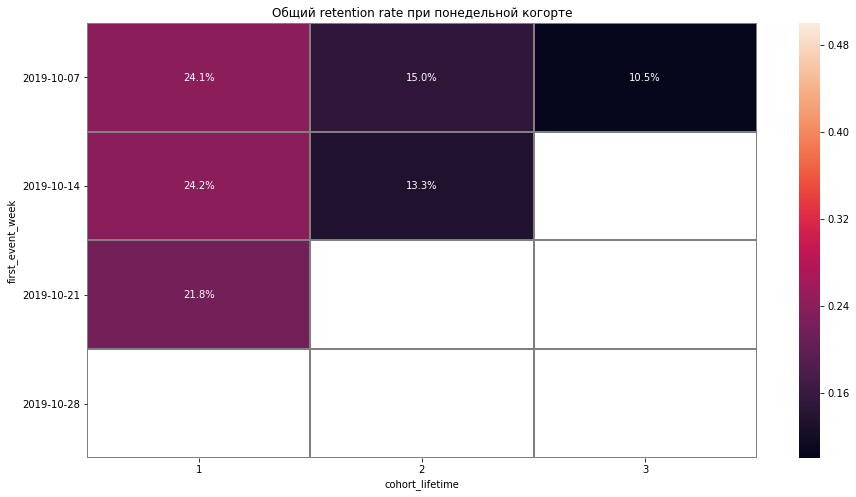

In [16]:
# построим хитмап изменения недельной активности (retention rate) 

plt.title('Общий retention rate при понедельной когорте')
ax = sns.heatmap(cohorts_pivot.drop(columns=[0]), annot=True, fmt='.1%', linewidth=1, linecolor='gray', vmin=0.1, vmax=0.5)
ax.set_yticklabels([t.get_text().split("T")[0] for t in ax.get_yticklabels()])

plt.show()

Похоже купив что-то пользователь перестаёт активно пользоваться приложением

Разделим пользователей на группы - посмотрим, отличается ли поведение пользователей, которые смотрели контакты от пользователей, что это не делали

In [17]:
#введем фильтр для отслеживания целевого события
user_filter = df.query('event_name == "contacts_show"')['user_id'].drop_duplicates()
display(user_filter)

122      8c356c42-3ba9-4cb6-80b8-3f868d0192c3
350      17f6b2db-2964-4d11-89d8-7e38d2cb4750
413      48e614d6-fe03-40f7-bf9e-4c4f61c19f64
830      9dfa242e-8630-480a-806b-5736bcda8f3d
952      f60a4cd4-f82c-4897-9804-3b7b130b15ac
                         ...                 
73958    a0944ccf-5813-427a-966e-b146d4e9adbc
73984    ec70be94-3ea7-4ac2-90fb-da1a044d7e30
74021    8cb7761d-ea9f-4631-b4b8-90e6bd30848b
74036    da4b7af3-c603-457a-8506-71d90077417b
74187    c10055f0-0b47-477a-869e-d391b31fdf8f
Name: user_id, Length: 981, dtype: object

Из 4293 уникальных пользователей, смотрели контакты 981. 
Подготовим две таблицы, для дальнейшей обработки и сравнения данных групп

In [18]:
#формируем две новые таблицы
gud_df = df.query('user_id in @user_filter')
bad_df = df.query('user_id not in @user_filter')

Посмотрим на таблицы внимательнее:

In [19]:
print('Таблица gud_df пользователи, что смотрели контакты')
#Просмотрим общую информацию о данных

print (' ')
print ('Общая информация о данных')
gud_df.info()

#Просмотрим данные функцией describle

print (' ')
print ('Описание данных')
print(gud_df.describe())
print (' ')

# Применим случайную выборку данных для первичного ознакомления
# Укажем параметр random_state=1, для сохранения результата при повторных запусках алгоритма, если нам
# вдруг понадобится

print ('Случайная выборка данных')
gud_df.sample(5, random_state=1)


Таблица gud_df пользователи, что смотрели контакты
 
Общая информация о данных
<class 'pandas.core.frame.DataFrame'>
Int64Index: 27197 entries, 121 to 74191
Data columns (total 6 columns):
event_time    27197 non-null datetime64[ns]
event_name    27197 non-null object
user_id       27197 non-null object
event_date    27197 non-null datetime64[ns]
event_week    27197 non-null int64
source        27197 non-null object
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 1.5+ MB
 
Описание данных
       event_week
count   27,197.00
mean        42.68
std          1.08
min         41.00
25%         42.00
50%         43.00
75%         44.00
max         44.00
 
Случайная выборка данных


,event_time,event_name,user_id,event_date,event_week,source
25317,2019-10-22 12:14:09,search,e0e93278-71b3-4f68-951f-ded06fdc237f,2019-10-22,43,yandex
30685,2019-11-01 11:01:11,tips_show,7b4b1fee-a552-4ea4-8c24-b4bfa4a96b03,2019-11-01,44,yandex
72250,2019-11-02 15:38:21,contacts_show,0410a648-99aa-4554-b064-963c2c5d1974,2019-11-02,44,yandex
58520,2019-10-26 11:21:38,tips_show,974cafad-17a9-4684-a1d0-5e14c7c61ead,2019-10-26,43,google
4721,2019-10-07 20:33:42,contacts_show,ffc01466-fdb1-4460-ae94-e800f52eb136,2019-10-07,41,yandex


In [20]:
print('Таблица bad_df пользователи, которые не смотрели контакты')
#Просмотрим общую информацию о данных

print (' ')
print ('Общая информация о данных')
bad_df.info()

#Просмотрим данные функцией describle

print (' ')
print ('Описание данных')
print(bad_df.describe())
print (' ')

# Применим случайную выборку данных для первичного ознакомления
# Укажем параметр random_state=1, для сохранения результата при повторных запусках алгоритма, если нам
# вдруг понадобится

print ('Случайная выборка данных')
bad_df.sample(5, random_state=1)

Таблица bad_df пользователи, которые не смотрели контакты
 
Общая информация о данных
<class 'pandas.core.frame.DataFrame'>
Int64Index: 47000 entries, 0 to 74196
Data columns (total 6 columns):
event_time    47000 non-null datetime64[ns]
event_name    47000 non-null object
user_id       47000 non-null object
event_date    47000 non-null datetime64[ns]
event_week    47000 non-null int64
source        47000 non-null object
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 2.5+ MB
 
Описание данных
       event_week
count   47,000.00
mean        42.54
std          1.10
min         41.00
25%         42.00
50%         43.00
75%         43.00
max         44.00
 
Случайная выборка данных


,event_time,event_name,user_id,event_date,event_week,source
14754,2019-10-10 17:11:05,tips_show,46865390-ef2c-4b8a-8b6b-b94ae5b4c3c7,2019-10-10,41,yandex
740,2019-10-07 09:44:56,tips_show,fb667205-a708-4693-832d-363a30022cfc,2019-10-07,41,yandex
72895,2019-11-03 17:37:37,tips_show,0f4ca9b5-25bd-410b-b83a-21d2d7daff75,2019-11-03,44,yandex
24204,2019-10-13 21:28:12,advert_open,6a1f495c-f6dc-475d-a286-ed802d6627be,2019-10-13,41,other
72101,2019-11-02 13:03:36,search,83929fe8-65f0-41a4-bd2e-11ec6530d4b3,2019-11-02,44,yandex


Похоже те пользователи, что смотрят контакты гораздо более активны.
Рассчитаем Retention Rate для каждой из наших групп. Я предполагаю, что те кто просматривают контакты больше времени посещают сайт.

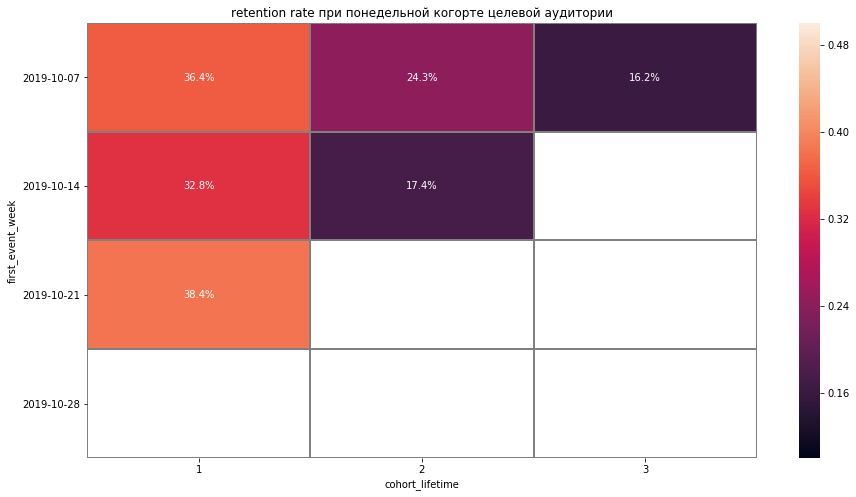

In [21]:
#найдем дату первой операции
first_visit_date = gud_df.groupby('user_id')['event_date'].min()
first_visit_date.name = 'first_event_date'
gud_df = gud_df.join(first_visit_date, on = 'user_id')

#выделим недели и неделю первого события, а также промежуток пока события были
gud_df['event_week'] = pd.to_datetime(gud_df['event_date'], unit='d') - pd.to_timedelta(gud_df['event_date'].dt.dayofweek,unit='d')
gud_df['first_event_week'] = pd.to_datetime(gud_df['first_event_date'], unit='d') - pd.to_timedelta(gud_df['first_event_date'].dt.dayofweek,unit='d')
gud_df['cohort_lifetime'] = ((gud_df['event_week'] - gud_df['first_event_week']) / np.timedelta64(1,'W')).astype('int')

#рассчитаем когорты
cohorts = gud_df.groupby(['first_event_week', 'cohort_lifetime']).agg({'user_id': 'nunique'}).reset_index()
cohorts_initial = cohorts[cohorts['cohort_lifetime'] == 0][['first_event_week', 'user_id']]
cohorts_initial = cohorts_initial.rename(columns={'user_id': 'cohort_size'})
cohorts = cohorts.merge(cohorts_initial, on='first_event_week', how='left')
cohorts['retention'] = cohorts['user_id'] / cohorts['cohort_size']


#отследим как изменяется количество активных пользователей внутри когорты
cohorts_pivot = cohorts.pivot_table(index='first_event_week', columns='cohort_lifetime', values='retention', aggfunc='sum')


# построим хитмап изменения недельной активности (retention rate) 
plt.title('retention rate при понедельной когорте целевой аудитории')
ax = sns.heatmap(cohorts_pivot.drop(columns=[0]), annot=True, fmt='.1%', linewidth=1, linecolor='gray', vmin=0.1, vmax=0.5)
ax.set_yticklabels([t.get_text().split("T")[0] for t in ax.get_yticklabels()])
plt.show()

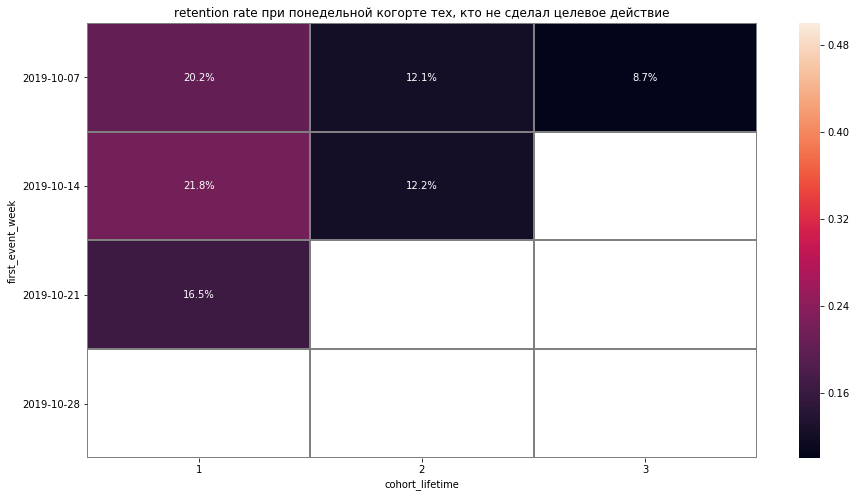

In [22]:
#найдем дату первой операции
first_visit_date = bad_df.groupby('user_id')['event_date'].min()
first_visit_date.name = 'first_event_date'
bad_df = bad_df.join(first_visit_date, on = 'user_id')

#выделим недели и неделю первого события, а также промежуток пока события были
bad_df['event_week'] = pd.to_datetime(bad_df['event_date'], unit='d') - pd.to_timedelta(bad_df['event_date'].dt.dayofweek,unit='d')
bad_df['first_event_week'] = pd.to_datetime(bad_df['first_event_date'], unit='d') - pd.to_timedelta(bad_df['first_event_date'].dt.dayofweek,unit='d')
bad_df['cohort_lifetime'] = ((bad_df['event_week'] - bad_df['first_event_week']) / np.timedelta64(1,'W')).astype('int')

#рассчитаем когорты
cohorts = bad_df.groupby(['first_event_week', 'cohort_lifetime']).agg({'user_id': 'nunique'}).reset_index()
cohorts_initial = cohorts[cohorts['cohort_lifetime'] == 0][['first_event_week', 'user_id']]
cohorts_initial = cohorts_initial.rename(columns={'user_id': 'cohort_size'})
cohorts = cohorts.merge(cohorts_initial, on='first_event_week', how='left')
cohorts['retention'] = cohorts['user_id'] / cohorts['cohort_size']

#отследим как изменяется количество активных пользователей внутри когорты
cohorts_pivot = cohorts.pivot_table(index='first_event_week', columns='cohort_lifetime', values='retention', aggfunc='sum')

# построим хитмап изменения недельной активности (retention rate) 
plt.title('retention rate при понедельной когорте тех, кто не сделал целевое действие')
ax = sns.heatmap(cohorts_pivot.drop(columns=[0]), annot=True, fmt='.1%', linewidth=1, linecolor='gray', vmin=0.1, vmax=0.5)
ax.set_yticklabels([t.get_text().split("T")[0] for t in ax.get_yticklabels()])
plt.show()

### Промежуточные выводы

Если мы посмотрим общий retention rate то при недельных когортах он в первую неделю хорош для мобильного приложения и составляет около 25%, а ещё через неделю жизни идёт стремительное падение активности пользователей.
При этом когда мы начинаем анализировать целевую и нецелевую группы, то очевидно, что retention rate тех, кто просматривает контакты заметно больше и достигает на первой неделе 38%. Также очевидно, что это более активные пользователи, которые генерят больше действии и событий (981 пользователь генерит 27 тысяч команд, в то время как 3312 пользователей нецелевой группы генерят за то же время всего 47 тысяч команд).
Дополнительно интересно посмотреть на поведение 3-й когорты - она демонстрирует более низкое удержание нецелевой группы (16,5%) и очень высокое удержание целевой группы (38,4%). Я рекомендую проверить маркетинговые действия или иные изменения которые вводились командой приложения в эту неделю.

### Время в приложении

Исследуем время проведеное пользователями в приложении. Под временем проведенном в приложении мы берем время первого и последнего события в день. Проверим есть ли разница во времени проведения на сайте между выделенными группами.

In [23]:
#сделаем специальный датасет для работы с временем
dft = df.copy(deep=True)

#проверим, как он выглядит
display(dft)

# вычленяем нужные нам даты визита в день на пользователя
time_in_program = dft.groupby(['user_id', 'event_date']).agg({'event_time': ['max','min']})
time_in_program.columns = ['last_visit_in_date','first_visit_in_date']

#высчитаем время по дням
time_in_program['delta_time'] = time_in_program['last_visit_in_date'] - time_in_program['first_visit_in_date']
time_in_program['delta_time'] = time_in_program['delta_time'].astype('timedelta64[s]')
time_in_program['delta_time_minutes'] =time_in_program['delta_time']/60

#проверим результат
display(time_in_program)

,event_time,event_name,user_id,event_date,event_week,source
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,41,other
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,41,other
2,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,41,other
3,2019-10-07 00:01:27,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,41,other
4,2019-10-07 00:01:34,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,41,other
...,...,...,...,...,...,...
74192,2019-11-03 23:46:47,map,d157bffc-264d-4464-8220-1cc0c42f43a9,2019-11-03,44,google
74193,2019-11-03 23:46:58,advert_open,d157bffc-264d-4464-8220-1cc0c42f43a9,2019-11-03,44,google
74194,2019-11-03 23:47:01,tips_show,d157bffc-264d-4464-8220-1cc0c42f43a9,2019-11-03,44,google
74195,2019-11-03 23:47:47,advert_open,d157bffc-264d-4464-8220-1cc0c42f43a9,2019-11-03,44,google


last_visit_in_date  \
user_id                              event_date                       
0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07 2019-10-07 13:49:41   
                                     2019-10-09 2019-10-09 18:42:22   
                                     2019-10-21 2019-10-21 20:07:30   
                                     2019-10-22 2019-10-22 11:30:52   
00157779-810c-4498-9e05-a1e9e3cedf93 2019-10-19 2019-10-19 21:59:54   
...                                                             ...   
fffb9e79-b927-4dbb-9b48-7fd09b23a62b 2019-10-29 2019-10-29 16:13:00   
                                     2019-10-30 2019-10-30 11:31:45   
                                     2019-11-01 2019-11-01 00:24:53   
                                     2019-11-02 2019-11-02 19:30:50   
                                     2019-11-03 2019-11-03 16:08:25   

                                                first_visit_in_date  \
user_id                              event_date                       
0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07 2019-10-07 13:39:45   
                                     2019-10-09 2019-10-09 18:33:55   
                                     2019-10-21 2019-10-21 19:52:30   
                                     2019-10-22 2019-10-22 11:18:14   
00157779-810c-4498-9e05-a1e9e3cedf93 2019-10-19 2019-10-19 21:34:33   
...                                                             ...   
fffb9e79-b927-4dbb-9b48-7fd09b23a62b 2019-10-29 2019-10-29 13:58:47   
                                     2019-10-30 2019-10-30 00:15:43   
                                     2019-11-01 2019-11-01 00:24:31   
                                     2019-11-02 2019-11-02 01:16:48   
                                     2019-11-03 2019-11-03 14:32:55   

                                                 delta_time  \
user_id                              event_date               
0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07      596.00   
                                     2019-10-09      507.00   
                                     2019-10-21      900.00   
                                     2019-10-22      758.00   
00157779-810c-4498-9e05-a1e9e3cedf93 2019-10-19    1,521.00   
...                                                     ...   
fffb9e79-b927-4dbb-9b48-7fd09b23a62b 2019-10-29    8,053.00   
                                     2019-10-30   40,562.00   
                                     2019-11-01       22.00   
                                     2019-11-02   65,642.00   
                                     2019-11-03    5,730.00   

                                                 delta_time_minutes  
user_id                              event_date                      
0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07                9.93  
                                     2019-10-09                8.45  
                                     2019-10-21               15.00  
                                     2019-10-22               12.63  
00157779-810c-4498-9e05-a1e9e3cedf93 2019-10-19               25.35  
...                                                             ...  
fffb9e79-b927-4dbb-9b48-7fd09b23a62b 2019-10-29              134.22  
                                     2019-10-30              676.03  
                                     2019-11-01                0.37  
                                     2019-11-02            1,094.03  
                                     2019-11-03               95.50  

[7817 rows x 4 columns]

Среднее время проводимое пользователем в приложении в день, мин: 83.03


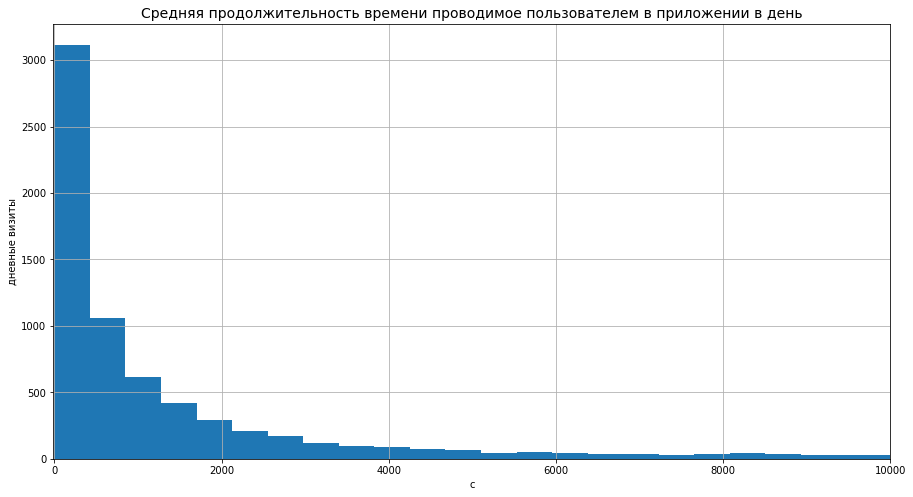

In [24]:

print('Среднее время проводимое пользователем в приложении в день, мин:',time_in_program['delta_time_minutes'].mean().round(2))

time_in_program['delta_time'].hist(bins=200)
plt.title('Средняя продолжительность времени проводимое пользователем в приложении в день', fontsize=14)
plt.xlabel('с')
plt.ylabel('дневные визиты')
plt.xlim(-10, 10000)
plt.show()

Сделаем подобные расчеты для выделенных групп

Время в день проводимое пользователями целевой группы в приложении


last_visit_in_date  \
user_id                              event_date                       
00157779-810c-4498-9e05-a1e9e3cedf93 2019-10-19 2019-10-19 21:59:54   
                                     2019-10-20 2019-10-20 20:05:36   
                                     2019-10-24 2019-10-24 10:57:12   
                                     2019-10-29 2019-10-29 22:10:25   
                                     2019-10-30 2019-10-30 08:26:53   
...                                                             ...   
fffb9e79-b927-4dbb-9b48-7fd09b23a62b 2019-10-29 2019-10-29 16:13:00   
                                     2019-10-30 2019-10-30 11:31:45   
                                     2019-11-01 2019-11-01 00:24:53   
                                     2019-11-02 2019-11-02 19:30:50   
                                     2019-11-03 2019-11-03 16:08:25   

                                                first_visit_in_date  \
user_id                              event_date                       
00157779-810c-4498-9e05-a1e9e3cedf93 2019-10-19 2019-10-19 21:34:33   
                                     2019-10-20 2019-10-20 18:49:24   
                                     2019-10-24 2019-10-24 10:50:40   
                                     2019-10-29 2019-10-29 21:18:24   
                                     2019-10-30 2019-10-30 07:50:45   
...                                                             ...   
fffb9e79-b927-4dbb-9b48-7fd09b23a62b 2019-10-29 2019-10-29 13:58:47   
                                     2019-10-30 2019-10-30 00:15:43   
                                     2019-11-01 2019-11-01 00:24:31   
                                     2019-11-02 2019-11-02 01:16:48   
                                     2019-11-03 2019-11-03 14:32:55   

                                                 delta_time  \
user_id                              event_date               
00157779-810c-4498-9e05-a1e9e3cedf93 2019-10-19    1,521.00   
                                     2019-10-20    4,572.00   
                                     2019-10-24      392.00   
                                     2019-10-29    3,121.00   
                                     2019-10-30    2,168.00   
...                                                     ...   
fffb9e79-b927-4dbb-9b48-7fd09b23a62b 2019-10-29    8,053.00   
                                     2019-10-30   40,562.00   
                                     2019-11-01       22.00   
                                     2019-11-02   65,642.00   
                                     2019-11-03    5,730.00   

                                                 delta_time_minutes  
user_id                              event_date                      
00157779-810c-4498-9e05-a1e9e3cedf93 2019-10-19               25.35  
                                     2019-10-20               76.20  
                                     2019-10-24                6.53  
                                     2019-10-29               52.02  
                                     2019-10-30               36.13  
...                                                             ...  
fffb9e79-b927-4dbb-9b48-7fd09b23a62b 2019-10-29              134.22  
                                     2019-10-30              676.03  
                                     2019-11-01                0.37  
                                     2019-11-02            1,094.03  
                                     2019-11-03               95.50  

[2475 rows x 4 columns]


Среднее время проводимое пользователем из целевой группы в приложении в день, мин: 124.01

Количество сессий пользователей из целевой группы: 2475

Время в день проводимое пользователями нецелевой группы в приложении


last_visit_in_date  \
user_id                              event_date                       
0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07 2019-10-07 13:49:41   
                                     2019-10-09 2019-10-09 18:42:22   
                                     2019-10-21 2019-10-21 20:07:30   
                                     2019-10-22 2019-10-22 11:30:52   
00463033-5717-4bf1-91b4-09183923b9df 2019-11-01 2019-11-01 14:19:17   
...                                                             ...   
ff82c7c7-16d6-44b1-833b-a217747b0b02 2019-10-28 2019-10-28 23:06:18   
                                     2019-10-30 2019-10-30 20:59:41   
ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07 2019-10-13 2019-10-13 16:40:50   
                                     2019-10-26 2019-10-26 19:53:51   
ffcf50d9-293c-4254-8243-4890b030b238 2019-10-23 2019-10-23 11:52:55   

                                                first_visit_in_date  \
user_id                              event_date                       
0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07 2019-10-07 13:39:45   
                                     2019-10-09 2019-10-09 18:33:55   
                                     2019-10-21 2019-10-21 19:52:30   
                                     2019-10-22 2019-10-22 11:18:14   
00463033-5717-4bf1-91b4-09183923b9df 2019-11-01 2019-11-01 13:54:35   
...                                                             ...   
ff82c7c7-16d6-44b1-833b-a217747b0b02 2019-10-28 2019-10-28 22:25:48   
                                     2019-10-30 2019-10-30 19:38:17   
ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07 2019-10-13 2019-10-13 16:11:27   
                                     2019-10-26 2019-10-26 19:33:49   
ffcf50d9-293c-4254-8243-4890b030b238 2019-10-23 2019-10-23 11:51:35   

                                                 delta_time  \
user_id                              event_date               
0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07      596.00   
                                     2019-10-09      507.00   
                                     2019-10-21      900.00   
                                     2019-10-22      758.00   
00463033-5717-4bf1-91b4-09183923b9df 2019-11-01    1,482.00   
...                                                     ...   
ff82c7c7-16d6-44b1-833b-a217747b0b02 2019-10-28    2,430.00   
                                     2019-10-30    4,884.00   
ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07 2019-10-13    1,763.00   
                                     2019-10-26    1,202.00   
ffcf50d9-293c-4254-8243-4890b030b238 2019-10-23       80.00   

                                                 delta_time_minutes  
user_id                              event_date                      
0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07                9.93  
                                     2019-10-09                8.45  
                                     2019-10-21               15.00  
                                     2019-10-22               12.63  
00463033-5717-4bf1-91b4-09183923b9df 2019-11-01               24.70  
...                                                             ...  
ff82c7c7-16d6-44b1-833b-a217747b0b02 2019-10-28               40.50  
                                     2019-10-30               81.40  
ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07 2019-10-13               29.38  
                                     2019-10-26               20.03  
ffcf50d9-293c-4254-8243-4890b030b238 2019-10-23                1.33  

[5342 rows x 4 columns]


Среднее время проводимое пользователем из нецелевой группы в приложении в день, мин: 64.05

Количество сессий пользователей из нецелевой группы: 5342



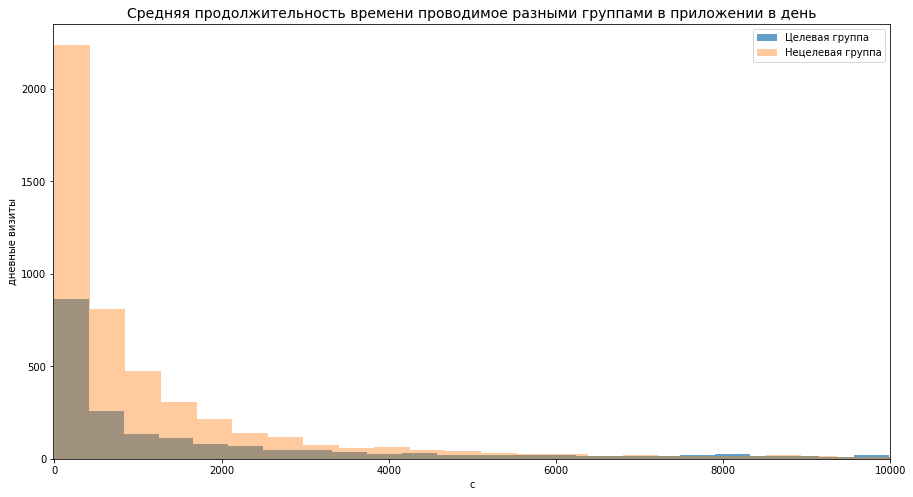

In [25]:
# вычленяем нужные нам даты визита в день на пользователя целевой группы
time_in_program_gud = gud_df.groupby(['user_id', 'event_date']).agg({'event_time': ['max','min']})
time_in_program_gud.columns = ['last_visit_in_date','first_visit_in_date']

#высчитаем время по дням целевой группы
time_in_program_gud['delta_time'] = time_in_program_gud['last_visit_in_date'] - time_in_program_gud['first_visit_in_date']
time_in_program_gud['delta_time'] = time_in_program_gud['delta_time'].astype('timedelta64[s]')
time_in_program_gud['delta_time_minutes'] =time_in_program_gud['delta_time']/60

#проверим результат для целевой группы
print('\033[1m' + 'Время в день проводимое пользователями целевой группы в приложении' + '\033[0m')
display(time_in_program_gud)
print('=' * 45)
print()
print('\033[1m' + 'Среднее время проводимое пользователем из целевой группы в приложении в день, мин:' + '\033[0m',time_in_program_gud['delta_time_minutes'].mean().round(2))
print()
print('\033[1m' + 'Количество сессий пользователей из целевой группы:' + '\033[0m',time_in_program_gud['delta_time_minutes'].count())
print()

# вычленяем нужные нам даты визита в день на пользователя нецелевой группы
time_in_program_bad = bad_df.groupby(['user_id', 'event_date']).agg({'event_time': ['max','min']})
time_in_program_bad.columns = ['last_visit_in_date','first_visit_in_date']

#высчитаем время по дням нецелевой группы
time_in_program_bad['delta_time'] = time_in_program_bad['last_visit_in_date'] - time_in_program_bad['first_visit_in_date']
time_in_program_bad['delta_time'] = time_in_program_bad['delta_time'].astype('timedelta64[s]')
time_in_program_bad['delta_time_minutes'] =time_in_program_bad['delta_time']/60

#проверим результат для нецелевой группы

print('\033[1m' + 'Время в день проводимое пользователями нецелевой группы в приложении' + '\033[0m')
display(time_in_program_bad)
print('=' * 45)
print()
print('\033[1m' + 'Среднее время проводимое пользователем из нецелевой группы в приложении в день, мин:' + '\033[0m',time_in_program_bad['delta_time_minutes'].mean().round(2))
print()
print('\033[1m' + 'Количество сессий пользователей из нецелевой группы:' + '\033[0m',time_in_program_bad['delta_time_minutes'].count())
print()

#построим совмещённый график
plt.hist(time_in_program_gud['delta_time'],bins=200,alpha=0.7, label='Целевая группа')
plt.hist(time_in_program_bad['delta_time'],bins=200,alpha=0.4, label='Нецелевая группа')
plt.title('Средняя продолжительность времени проводимое разными группами в приложении в день', fontsize=14)
plt.xlabel('с')
plt.ylabel('дневные визиты')
plt.legend(loc='upper right')
plt.xlim(-10, 10000)
plt.show()

### Промежуточные выводы

В среднем пользователи проводят в нашем приложении около 83 минут в день. Стоит также отметить что разброс сессий  по времени очень большой - большинство сессий пользователей короткие, но некотрые сессии исключительно длинные. 
Примечательно, что целевая группа проводит вдвое больше времени в приложении, нежели нецелевая (124 минуты против 64 минут) и их сессии имеют как большую частоту так и большую длительность.

### Частота действий пользователей

Проверим частоту действий пользователей, нас интересует сколько действий в день делает пользователь. Проверим, есть ли разница в наших выделенных группах. Также посчитаем в принципе оценку пользовательской активности (DAU и WAU)

In [26]:
#Сделаем необходимую группировку
df_freq = df.groupby('user_id').agg({'event_name': 'count'}).reset_index().sort_values(by='event_name', ascending=False)

#проверим результат
display(df_freq)

print('Среднее количество действий пользователя равно', int(df_freq['event_name'].mean()))

,user_id,event_name
3397,cb36854f-570a-41f4-baa8-36680b396370,478
3794,e13f9f32-7ae3-4204-8d60-898db040bcfc,465
2629,9ce63488-758a-481a-bcb5-a02b467e1d84,407
615,21230dd9-2f7f-4b77-a436-43d4d10388e0,400
3162,be1449f6-ca45-4f94-93a7-ea4b079b8f0f,397
...,...,...
1436,55f7dc86-a03b-4cff-adc6-61a23d4ab680,1
2139,800920e6-c654-434c-966e-8e3ebcee0d38,1
3006,b3aa5ec3-6e23-4fcf-bdcc-c0527228fd47,1
1776,6a2e7783-a775-4c7d-adf0-22d1983ce9bd,1


Среднее количество действий пользователя равно 17


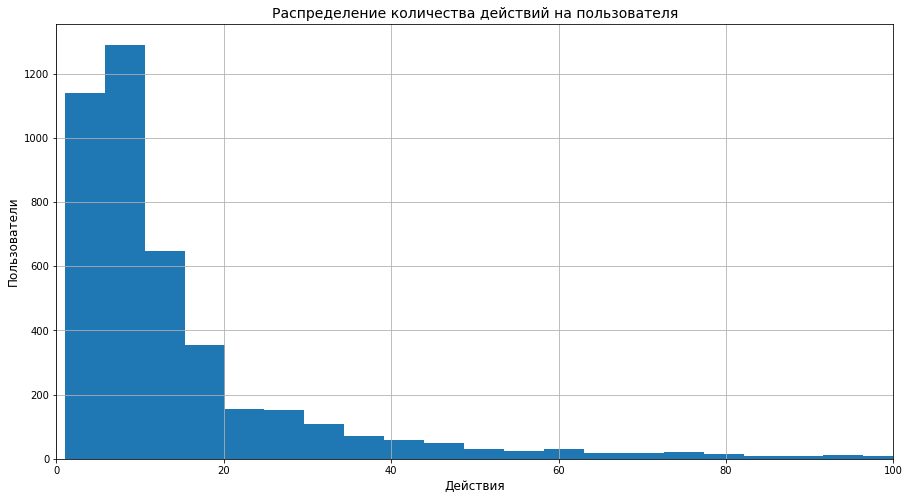

In [27]:
#построим гистаграмму

plt.title('Распределение количества действий на пользователя', fontsize=14)

df_freq['event_name'].hist(bins=100)
plt.xlabel('Действия', fontsize=12)
plt.ylabel('Пользователи', fontsize=12)
plt.xlim(0, 100);

Похоже разброс между активно и неактивно ведущими себя пользователями очень большой. Но в среднем пользователи совержают небольшое количество действий.

In [28]:
#посчитаем частоту уникальных действий пользователей
df_freq_unique = df.groupby('user_id').agg({'event_name': 'nunique'}).reset_index().sort_values(by='event_name', ascending=False)

#проверим результат
display(df_freq_unique)

print('Среднее количество уникальных действий пользователя равно', int(df_freq_unique['event_name'].mean()))

,user_id,event_name
1450,570e1e48-5bfb-4c99-84b6-a10d9a15bf05,7
4136,f6f94ebe-e69a-4ae3-9fb0-312d52d35826,7
3794,e13f9f32-7ae3-4204-8d60-898db040bcfc,7
3826,e38cb669-7335-4d56-9de5-c8d5d2f13fd3,7
2608,9b835c74-8ede-4586-9f59-e5473aa48de2,6
...,...,...
2666,9ee29b5f-3719-4d6f-be7f-852a00744394,1
647,231fbaad-5be4-4e22-9003-283f89ff6358,1
2661,9eb3cb9b-c66e-4009-921b-ed6ad3763198,1
2659,9e807919-ad8c-41ea-8ee0-39a17ac888fb,1


Среднее количество уникальных действий пользователя равно 2


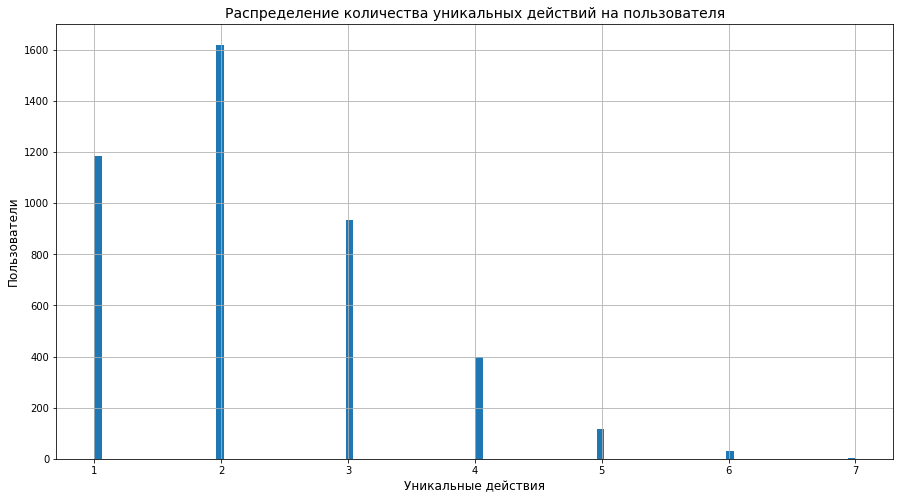

In [29]:
#построим гистаграмму количества уникальных действий, что делает пользователь

plt.title('Распределение количества уникальных действий на пользователя', fontsize=14)

df_freq_unique['event_name'].hist(bins=100)
plt.xlabel('Уникальные действия', fontsize=12)
plt.ylabel('Пользователи', fontsize=12);

А вот по уникальности действий всё странно. Похоже пользователи повторяют одни и те же действия из тех, что нам передали. С другой стороны, возможно это признак хорошего интерфейса

Посчитаем DAU и WAU

Среднее значение DAU составляет: 279


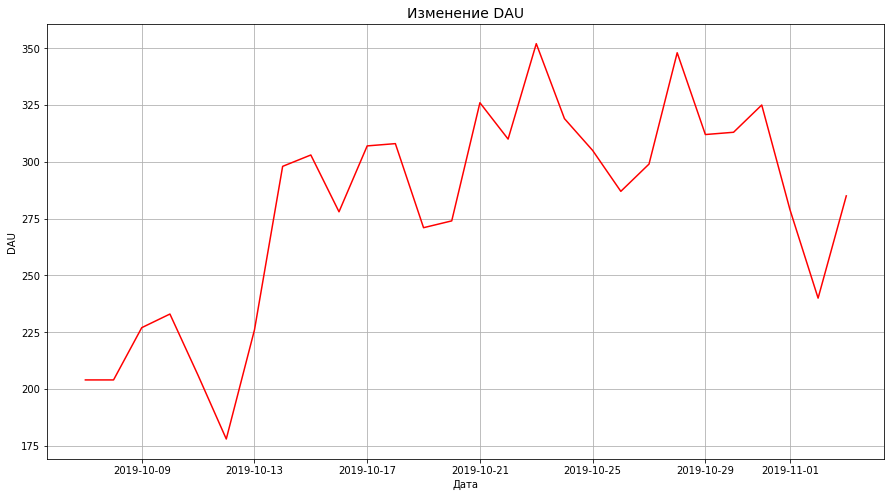

In [30]:
#сделаем нужную выборку
dau_shift = df.groupby('event_date').agg({'user_id': 'nunique'})

#построим график изменений
plt.plot(dau_shift, color='red')
plt.title('Изменение DAU', fontsize=14)
plt.xlabel('Дата')
plt.ylabel('DAU')
plt.grid()

#посчитаем среднее
dau_total = df.groupby('event_date').agg({'user_id': 'nunique'}).mean()
print('Среднее значение DAU составляет:',int(dau_total)) 

DAU имеет как пики так и просадки, но в целом растет, что хорошо

Среднее значение WAU составляет: 1382


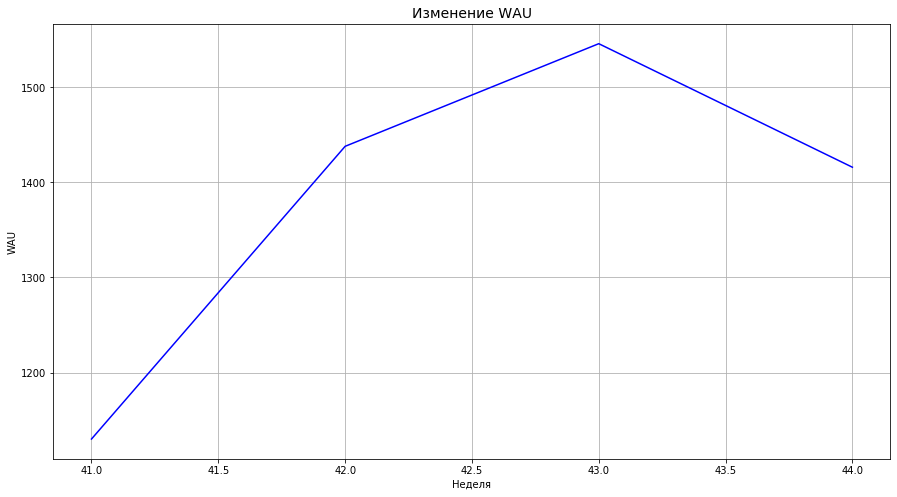

In [31]:
#сделаем нужную выборку
wau_shift = (
    df.groupby(['event_week'])
    .agg({'user_id': 'nunique'})
    )

#построим график изменений
plt.plot(wau_shift, color='blue')
plt.title('Изменение WAU', fontsize=14)
plt.xlabel('Неделя')
plt.ylabel('WAU')
plt.grid()

#посчитаем среднее
wau_total = df.groupby('event_week').agg({'user_id': 'nunique'}).mean()
print('Среднее значение WAU составляет:',int(wau_total)) 

WAU растет, особенно интересно отметить, что на 43-й неделе видимо происходили какие-то заметные изменения. Они повлекли повышение активности и, если вспомнить рассмотренный выше retention rate оказались очень хороши для нашей целевой группы

Проверим как меняется частота действия для целевой и нецелевой групп пользователей. Для сравнения сделаем наложение графиков

Частота действий пользователей целевой группы


,user_id,event_name
777,cb36854f-570a-41f4-baa8-36680b396370,478
856,e13f9f32-7ae3-4204-8d60-898db040bcfc,465
148,21230dd9-2f7f-4b77-a436-43d4d10388e0,400
712,be1449f6-ca45-4f94-93a7-ea4b079b8f0f,397
864,e38cb669-7335-4d56-9de5-c8d5d2f13fd3,362
...,...,...
434,715d38f6-0e2c-4ae6-b3e9-6e52f5634ae5,1
409,6a2e7783-a775-4c7d-adf0-22d1983ce9bd,1
362,5f2607e8-5f7e-476e-9ef4-f17a26afe6c8,1
878,e85710d2-a93c-4d0c-b1a2-efcbafad853d,1



Среднее количество действий пользователя целевой группы равно 27

Частота действий пользователей нецелевой группы


,user_id,event_name
2015,9ce63488-758a-481a-bcb5-a02b467e1d84,407
436,1e49028e-e90e-4b27-9467-c101d8f94156,250
2552,c68bdd6d-bad7-4f51-8113-302f2364387c,188
613,2ce6c413-30d2-4d26-8b83-0bd21bc66546,186
2931,e0a19ff5-468c-4c47-8dc4-bc4eb9854a96,184
...,...,...
90,07b1849e-eb60-444d-98cb-f8516ad23a74,1
86,0729a0c7-9e58-4ea9-92bf-33830024ee68,1
2917,df7e87b9-5aed-42f0-bcad-e4dabb4c902d,1
1393,6c85571b-8ca6-45bd-aae7-ec7226157f19,1



Среднее количество действий пользователя нецелевой группы равно 14



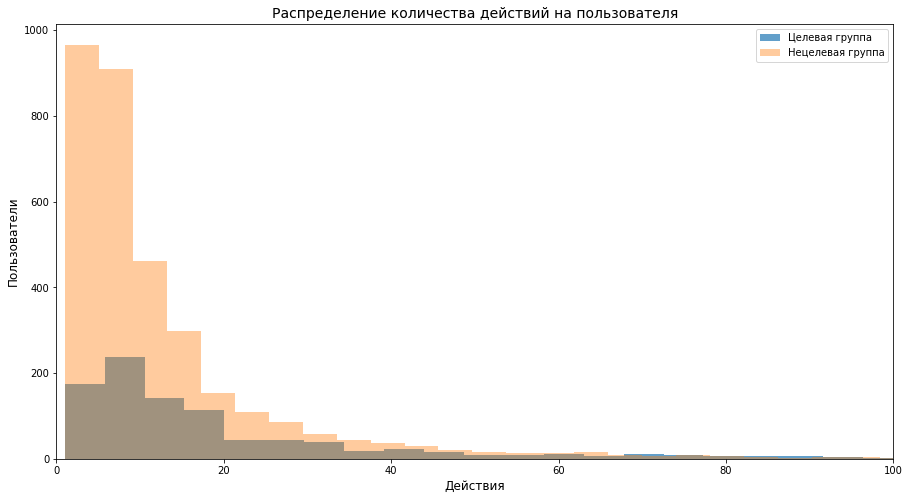

In [32]:
#Сделаем необходимую группировку целевой и нецелевой группы
df_freq_gud = gud_df.groupby('user_id').agg({'event_name': 'count'}).reset_index().sort_values(by='event_name', ascending=False)
df_freq_bad = bad_df.groupby('user_id').agg({'event_name': 'count'}).reset_index().sort_values(by='event_name', ascending=False)

#проверим результат для целевой группы
print('\033[1m' + 'Частота действий пользователей целевой группы' + '\033[0m')
display(df_freq_gud)
print('=' * 45)
print()
print('\033[1m' + 'Среднее количество действий пользователя целевой группы равно' + '\033[0m',int(df_freq_gud['event_name'].mean()))
print()

#проверим результат для целевой группы
print('\033[1m' + 'Частота действий пользователей нецелевой группы' + '\033[0m')
display(df_freq_bad)
print('=' * 45)
print()
print('\033[1m' + 'Среднее количество действий пользователя нецелевой группы равно' + '\033[0m',int(df_freq_bad['event_name'].mean()))
print()


#построим совмещённый график
plt.hist(df_freq_gud['event_name'],bins=100,alpha=0.7, label='Целевая группа')
plt.hist(df_freq_bad['event_name'],bins=100,alpha=0.4, label='Нецелевая группа')
plt.title('Распределение количества действий на пользователя', fontsize=14)
plt.legend(loc='upper right')
plt.xlabel('Действия', fontsize=12)
plt.ylabel('Пользователи', fontsize=12)
plt.xlim(0, 100);
plt.show()


Целевая группа показывает значительно более активное поведение. Среднее количество действий представителей целевой группы 27, что почти в два раза (простив 14-ти) больше среднего количества действий нецелевой группы. Разница это ещё более заметна в правой части гистаграммы, среди самых актиынх пользователей, почти все они принадлежат к целевой группе

Частота уникальных действий пользователей целевой группы


,user_id,event_name
946,f6f94ebe-e69a-4ae3-9fb0-312d52d35826,7
856,e13f9f32-7ae3-4204-8d60-898db040bcfc,7
331,570e1e48-5bfb-4c99-84b6-a10d9a15bf05,7
864,e38cb669-7335-4d56-9de5-c8d5d2f13fd3,7
163,2552d969-dbd4-4fcb-aad2-5b2fcff28d61,6
...,...,...
766,c94a95e7-7188-44c0-854c-eadfb0a02c35,1
471,7bd1850a-900c-45a3-b988-b4af2faea694,1
133,1c8c7c78-9f15-4dee-8d88-b01d6a062a42,1
55,0bb1cfac-5a00-4677-88d0-d41929e5ad7c,1



Среднее количество уникальных действий пользователя целевой группы равно 3

Частота уникальных действий пользователей нецелевой группы


,user_id,event_name
353,18d7892a-c92f-4f7c-ad1b-9ca08542554c,6
2644,cc9d6e03-dedb-438a-be3d-f8bb4013a65f,6
1142,593f807c-87d3-49c7-821b-bbe93d797c22,6
2392,b981d7cd-2705-4dda-88ea-784de3867b3f,6
1232,5f99c4dc-7c7a-4883-bfcf-02431659b16f,5
...,...,...
913,455a8dab-2055-4bea-9203-a5ef9ae50e92,1
2255,ae886d53-f20a-44cd-a5d1-57d7836ab16c,1
2252,ae3d27f3-fa0b-4404-88a5-881d85a25459,1
917,45b1cf7b-b65d-4636-8734-6b81b4d7a3c5,1



Среднее количество уникальных действий пользователя нецелевой группы равно 1



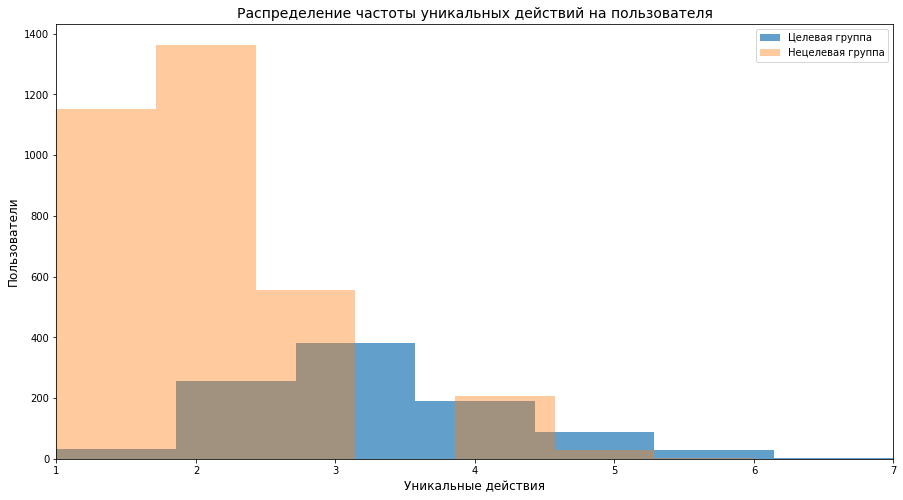

In [33]:

#Сделаем необходимую группировку целевой и нецелевой группы
df_freq_unique_gud = gud_df.groupby('user_id').agg({'event_name': 'nunique'}).reset_index().sort_values(by='event_name', ascending=False)
df_freq_unique_bad = bad_df.groupby('user_id').agg({'event_name': 'nunique'}).reset_index().sort_values(by='event_name', ascending=False)

#проверим результат для целевой группы
print('\033[1m' + 'Частота уникальных действий пользователей целевой группы' + '\033[0m')
display(df_freq_unique_gud)
print('=' * 45)
print()
print('\033[1m' + 'Среднее количество уникальных действий пользователя целевой группы равно' + '\033[0m',int(df_freq_unique_gud['event_name'].mean()))
print()

#проверим результат для целевой группы
print('\033[1m' + 'Частота уникальных действий пользователей нецелевой группы' + '\033[0m')
display(df_freq_unique_bad)
print('=' * 45)
print()
print('\033[1m' + 'Среднее количество уникальных действий пользователя нецелевой группы равно' + '\033[0m',int(df_freq_unique_bad['event_name'].mean()))
print()


#построим совмещённый график
plt.hist(df_freq_unique_gud['event_name'],bins=7,alpha=0.7, label='Целевая группа')
plt.hist(df_freq_unique_bad['event_name'],bins=7,alpha=0.4, label='Нецелевая группа')
plt.title('Распределение частоты уникальных действий на пользователя', fontsize=14)
plt.legend(loc='upper right')
plt.xlabel('Уникальные действия', fontsize=12)
plt.ylabel('Пользователи', fontsize=12)
plt.xlim(1, 7);
plt.show()


Что касается разнообразия действий в приложении, то здесь целевая группа ещё более заметна своей активностью. Похоже, что большинство пользователей нецелевой группы делают одно действие. Затем похоже приложение им не нравится и они его стирают. Возможно, если предпринять больше действий на удержание пользователей, то наша целевая группа вырастет.

Среднее значение DAU целевой группы составляет: 88
Среднее значение DAU нецелевой группы составляет: 190


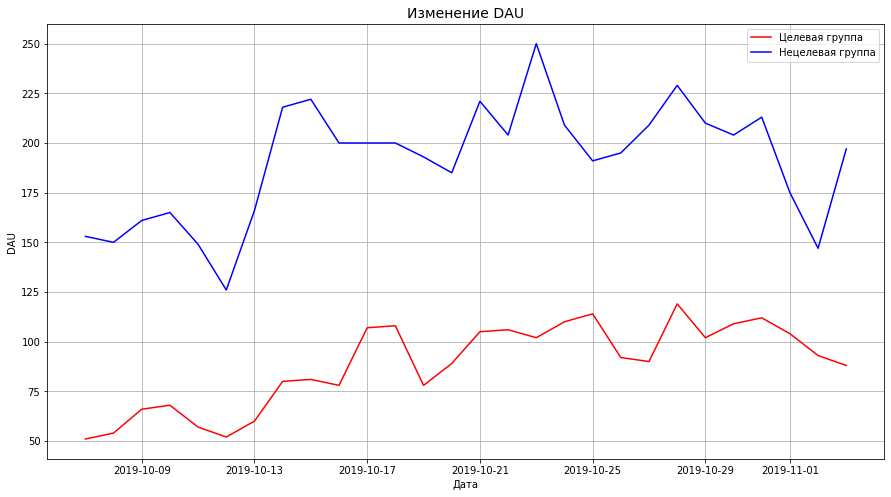

In [34]:

#сделаем нужную выборку DAU целевой и нецелевой группы
dau_shift_gud = gud_df.groupby('event_date').agg({'user_id': 'nunique'})
dau_shift_bad = bad_df.groupby('event_date').agg({'user_id': 'nunique'})

#посчитаем среднее для обеих групп
dau_total_gud = gud_df.groupby('event_date').agg({'user_id': 'nunique'}).mean()
print('Среднее значение DAU целевой группы составляет:',int(dau_total_gud)) 

dau_total_bad = bad_df.groupby('event_date').agg({'user_id': 'nunique'}).mean()
print('Среднее значение DAU нецелевой группы составляет:',int(dau_total_bad)) 



#построим совмещённый график изменений
plt.plot(dau_shift_gud, color='red', label='Целевая группа')
plt.plot(dau_shift_bad, color='blue', label='Нецелевая группа')
plt.title('Изменение DAU', fontsize=14)
plt.legend(loc='upper right')
plt.xlabel('Дата')
plt.ylabel('DAU')
plt.grid()

При сравнении DAU  я вижу устойчивые рост показателя. Видно что есть два провала в обоих группах и один пик нецелевой группы ( возможно это отражение неправильно настроенной рекламной кампании). 

Среднее значение WAU целевой группы составляет: 355
Среднее значение WAU нецелевой группы составляет: 1027


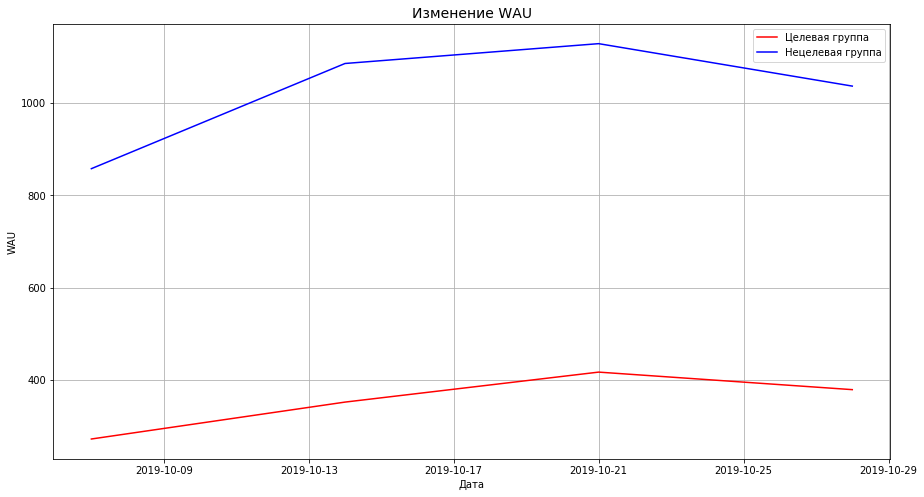

In [35]:

#сделаем нужную выборку WAU целевой и нецелевой группы
wau_shift_gud = gud_df.groupby('event_week').agg({'user_id': 'nunique'})
wau_shift_bad = bad_df.groupby('event_week').agg({'user_id': 'nunique'})

#посчитаем среднее для обеих групп
wau_total_gud = gud_df.groupby('event_week').agg({'user_id': 'nunique'}).mean()
print('Среднее значение WAU целевой группы составляет:',int(wau_total_gud)) 

wau_total_bad = bad_df.groupby('event_week').agg({'user_id': 'nunique'}).mean()
print('Среднее значение WAU нецелевой группы составляет:',int(wau_total_bad)) 



#построим совмещённый график изменений
plt.plot(wau_shift_gud, color='red', label='Целевая группа')
plt.plot(wau_shift_bad, color='blue', label='Нецелевая группа')
plt.title('Изменение WAU', fontsize=14)
plt.legend(loc='upper right')
plt.xlabel('Дата')
plt.ylabel('WAU')
plt.grid()

Виден устойчивый рост WAU. Особенно интересно посмотреть третью неделю. Если вспомнить рассмотренный выше retention rate то действия, что делали маркетологи нашего приложения оказались очень хороши для нашей целевой группы

### Промежуточные выводы

Целевая группа демонстрирует явно отличные от нецелевой группы показатели - пользователи целевой группы гораздо более активны (27 действий против 14 в среднем) из пятерки самых активных пользователей только один из нецелевой группы. Количество уникальных действий у целевой группы так же больше.

### Конверсия

К сожалению у нас нет точного пути пользователя. Можно предположить, что единственным путем примерного понимания конверсии, будет только отношение того или иного действия к факту входа в приложению поэтому мы сделаем предварительные расчеты, сведем их в одну таблицу и сделаем свои предположения по воронке и конверсии:

1. Подсчитаем сколько и каких действий совершили пользователи. Расположим события в порядке в котором двигалось большее количество пользователей.
2. Посчитаем сколько раз делал то или иное уникальное действие каждый пользователь в среднем
3. Подсчитаем какой процент всех уникальных пользователей делали то или иное действие
4. Отсортируем события по тому, сколько уникальных пользователей их делало. Предположим, что это даст нам примерное понимание воронки
5. Попробуем предположить процентное изменение на каждом шаге предполагаемой воронки


In [36]:
#сведем в одну таблицу данные для анализа конверсии

#сделаем необходимую начальную группировку проследим какие действия более частые.
df_nmbr_users = df.groupby('event_name').agg({'user_id': ['count', 'nunique']}).reset_index()

#переименуем колонки для удобства анализа
df_nmbr_users.columns = ['event_name', 'nmb_events', 'nmb_uniq_users']

# Посчитаем сколько раз делал то или иное уникальное действие каждый пользователь в среднем
df_nmbr_users['clicks_per_user'] = (df_nmbr_users['nmb_events'] / df_nmbr_users['nmb_uniq_users']).round(0)

# Подсчитаем какой процент всех уникальных пользователей делали то или иное действие
df_nmbr_users['pct_from_full_users'] = (df_nmbr_users['nmb_uniq_users'] / df['user_id'].unique().shape[0])

# Отсортируем события по тому, сколько уникальных пользователей их делало. Предположим
# что даст нам примерное понимание воронки
df_nmbr_users = df_nmbr_users.sort_values(by='nmb_uniq_users', ascending=False)

# Посчитаем процентное изменение на каждом шаге предполагаемой воронки
df_nmbr_users['pct_users_change'] = 1 + df_nmbr_users['nmb_uniq_users'].pct_change()

# Выведем результат
print('\033[1m' + 'Предполагаемая воронка по уникальным пользователям' + '\033[0m')
display(df_nmbr_users)

Предполагаемая воронка по уникальным пользователям


,event_name,nmb_events,nmb_uniq_users,clicks_per_user,pct_from_full_users,pct_users_change
8,tips_show,40055,2801,14.00,0.65,nan
6,search,6784,1666,4.00,0.39,0.59
4,map,3881,1456,3.00,0.34,0.87
5,photos_show,10012,1095,9.00,0.26,0.75
2,contacts_show,4529,981,5.00,0.23,0.90
0,advert_open,6164,751,8.00,0.17,0.77
3,favorites_add,1417,351,4.00,0.08,0.47
7,tips_click,814,322,3.00,0.08,0.92
1,contacts_call,541,213,3.00,0.05,0.66


In [37]:
#сведем в одну таблицу данные для анализа конверсии

test_con = df.query

#сделаем необходимую начальную группировку проследим какие действия более частые.
df_nmbr_users = df.groupby('event_name').agg({'user_id': ['count', 'nunique']}).reset_index()

#переименуем колонки для удобства анализа
df_nmbr_users.columns = ['event_name', 'nmb_events', 'nmb_uniq_users']

# Посчитаем сколько раз делал то или иное уникальное действие каждый пользователь в среднем
df_nmbr_users['clicks_per_user'] = (df_nmbr_users['nmb_events'] / df_nmbr_users['nmb_uniq_users']).round(0)

# Подсчитаем какой процент всех уникальных пользователей делали то или иное действие
df_nmbr_users['pct_from_full_users'] = (df_nmbr_users['nmb_uniq_users'] / df['user_id'].unique().shape[0])

# Отсортируем события по тому, сколько уникальных пользователей их делало. Предположим
# что даст нам примерное понимание воронки
df_nmbr_users = df_nmbr_users.sort_values(by='nmb_uniq_users', ascending=False)

# Посчитаем процентное изменение на каждом шаге предполагаемой воронки
df_nmbr_users['pct_users_change'] = 1 + df_nmbr_users['nmb_uniq_users'].pct_change()

# Подсчитаем какой процент всех уникальных пользователей делали то или иное действие
df_nmbr_users['pct_from_full_users'] = (df_nmbr_users['nmb_uniq_users'] / df['user_id'].unique().shape[0])

# Выведем результат
print('\033[1m' + 'Предполагаемая воронка по уникальным пользователям' + '\033[0m')
display(df_nmbr_users)

Предполагаемая воронка по уникальным пользователям


,event_name,nmb_events,nmb_uniq_users,clicks_per_user,pct_from_full_users,pct_users_change
8,tips_show,40055,2801,14.00,0.65,nan
6,search,6784,1666,4.00,0.39,0.59
4,map,3881,1456,3.00,0.34,0.87
5,photos_show,10012,1095,9.00,0.26,0.75
2,contacts_show,4529,981,5.00,0.23,0.90
0,advert_open,6164,751,8.00,0.17,0.77
3,favorites_add,1417,351,4.00,0.08,0.47
7,tips_click,814,322,3.00,0.08,0.92
1,contacts_call,541,213,3.00,0.05,0.66


Если судить по получившейся предварительной воронке, то у нас нет четкого пути пользователя. Из 4239 уникальных пользователей (как мы определили на этапе предварительного анализа данных) даже самое первое из тех событий что есть у нас **(tips_show — пользователь увидел рекомендованные объявления)** сделало только 65% пользователей. Можно было бы предположить, что дальше будет порядок в действиях, но даже логичный шаг - **(advert_open — открытие карточки объявления)** а затем **(contacts_show — пользователь нажал на кнопку "посмотреть номер телефона" на карточке объявления)** так же не работает. В этом случае правда можно предположить, что если сложить два действия - **advert_open** и **(favorites_add — добавление объявления в избранное)** то далее следует как раз **contacts_show**.

Для уверенного анализа воронки я рекомендую собрать подробный датасет совместно с отделом маркетинга с указанием возможных точкек входа и пути пользователя.

На основе предоставленных данных, в разрезе требований к исследованию можно рассматривать только примитивную воронку - вход в приложение - **contacts_show** - в данном варианте конверсия в целевое действие составляет **23%** 


Проверим разницу поведении между целевой и нецелевой группами. Возможно есть какие-то действия характерные для той или иной группы

Характерные действия целевой группы:


,event_name,user_id,pct_from_group
2,contacts_show,981,1.00
8,tips_show,516,0.53
6,search,377,0.38
5,photos_show,339,0.35
4,map,289,0.29
1,contacts_call,213,0.22
0,advert_open,138,0.14
3,favorites_add,136,0.14
7,tips_click,100,0.10



Характерные действия нецелевой группы:


,event_name,user_id,pct_from_group
6,tips_show,2285,0.69
4,search,1289,0.39
2,map,1167,0.35
3,photos_show,756,0.23
0,advert_open,613,0.19
5,tips_click,222,0.07
1,favorites_add,215,0.06


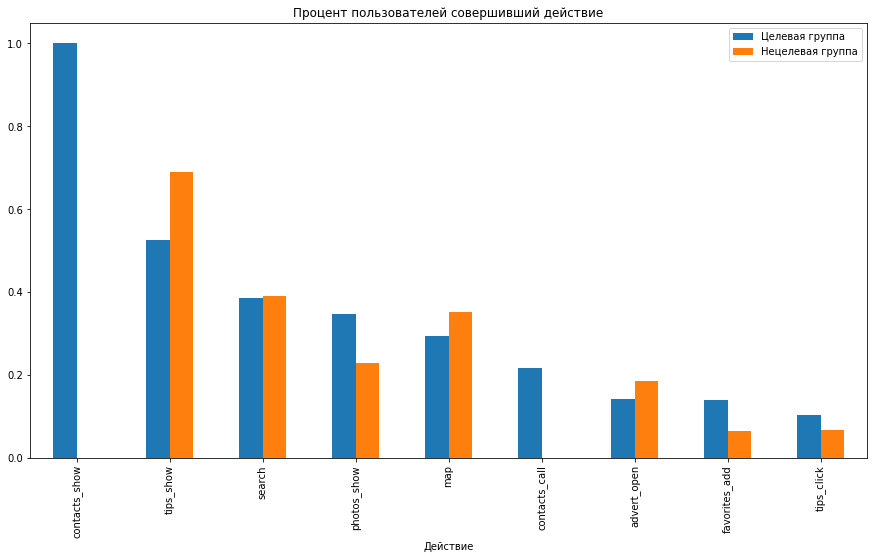

In [38]:
#зададим количество уникальных пользователей в группе

gud_user = df[df['event_name'] == 'contacts_show']['user_id'].drop_duplicates()

#посчитаем характерные действия для целевой группы
gud_df_tunnel = gud_df.groupby('event_name').agg({'user_id': 'nunique'}).reset_index().sort_values(by='user_id', ascending=False)
gud_df_tunnel['pct_from_group'] = gud_df_tunnel['user_id'] / gud_user.shape[0]

print('\033[1m' + 'Характерные действия целевой группы:' + '\033[0m')
display(gud_df_tunnel)
print('=' * 45)
print()


#посчитаем характерные действия для нецелевой группы
bad_df_tunnel = bad_df.groupby('event_name').agg({'user_id': 'nunique'}).reset_index().sort_values(by='user_id', ascending=False)
bad_df_tunnel['pct_from_group'] = bad_df_tunnel['user_id'] / (df['user_id'].unique().shape[0] - gud_user.shape[0])

print('\033[1m' + 'Характерные действия нецелевой группы:' + '\033[0m')
display(bad_df_tunnel)
print('=' * 45)
print()


#Построим сводный график характерных действий
#Сведем две таблицы вместе
gud_df_tunnel = gud_df_tunnel.rename(columns = {'users_id':'gud_user', 'pct_from_group':'gud_pct'})
bad_df_tunnel = bad_df_tunnel.rename(columns = {'users_id':'bad_user', 'pct_from_group':'bad_pct'})
groups_tunnel = gud_df_tunnel.merge(bad_df_tunnel, on='event_name', how='left')
#заполним нулями те действия, которых нет в нецелевой группе (contacts_show и contacts_call)
groups_tunnel = groups_tunnel.fillna(0)

#построим график
ax = groups_tunnel.plot.bar(x='event_name', y=['gud_pct','bad_pct'])
plt.title('Процент пользователей совершивший действие')
plt.xlabel('Действие')
plt.legend(labels=['Целевая группа', 'Нецелевая группа'])
plt.show()


Для целевой группы характерно несколько большее количество просмотров фото и добавлений объявления в избранное, а также несколько большее количество кликов по рекомендованному объявлению.
Для нецелевой группы характерно смотреть на рекомендованные объявления и несколько больше смотреть карту размещённых объявлений


Проверим конверсию из различных действий. Найдем пользователей совершавших те или иные действия и посмотрим, сколько из них совершали те или иные действия, в том числе и наше целевое действие (contacts_show)

In [39]:
#сделаем выборку действий, по которым будем смотреть конверсию.
test_list = ['advert_open', 'map', 'tips_click', 'search', 'photos_show', 'favorites_add']


for name in test_list:
    test_con = df[df['event_name'] == name]['user_id'].drop_duplicates()
    d_c_a = df[df['user_id'].isin(test_con)]
    d_c_a_tunnel = d_c_a.groupby('event_name').agg({'user_id': 'nunique'}).reset_index().sort_values(by='user_id', ascending=False)
    d_c_a_tunnel['nmb_uniq_users_pct'] = d_c_a_tunnel['user_id'] / d_c_a['user_id'].unique().shape[0]
    print ('Конверсия из', name)
    display(d_c_a_tunnel)


Конверсия из advert_open


,event_name,user_id,nmb_uniq_users_pct
0,advert_open,751,1.00
8,tips_show,590,0.79
4,map,517,0.69
6,search,339,0.45
2,contacts_show,138,0.18
3,favorites_add,120,0.16
5,photos_show,73,0.10
7,tips_click,66,0.09
1,contacts_call,21,0.03


Конверсия из map


,event_name,user_id,nmb_uniq_users_pct
3,map,1456,1.00
7,tips_show,1352,0.93
0,advert_open,517,0.36
5,search,463,0.32
1,contacts_show,289,0.20
6,tips_click,148,0.10
2,favorites_add,64,0.04
4,photos_show,5,0.00


Конверсия из tips_click


,event_name,user_id,nmb_uniq_users_pct
6,tips_click,322,1.00
7,tips_show,297,0.92
3,map,148,0.46
1,contacts_show,100,0.31
5,search,81,0.25
0,advert_open,66,0.20
2,favorites_add,32,0.10
4,photos_show,4,0.01


Конверсия из search


,event_name,user_id,nmb_uniq_users_pct
6,search,1666,1.00
8,tips_show,801,0.48
5,photos_show,647,0.39
4,map,463,0.28
2,contacts_show,377,0.23
0,advert_open,339,0.20
3,favorites_add,201,0.12
1,contacts_call,112,0.07
7,tips_click,81,0.05


Конверсия из photos_show


,event_name,user_id,nmb_uniq_users_pct
5,photos_show,1095,1.00
6,search,647,0.59
2,contacts_show,339,0.31
3,favorites_add,202,0.18
1,contacts_call,157,0.14
0,advert_open,73,0.07
8,tips_show,13,0.01
4,map,5,0.00
7,tips_click,4,0.00


Конверсия из favorites_add


,event_name,user_id,nmb_uniq_users_pct
3,favorites_add,351,1.00
5,photos_show,202,0.58
6,search,201,0.57
2,contacts_show,136,0.39
0,advert_open,120,0.34
8,tips_show,108,0.31
4,map,64,0.18
1,contacts_call,41,0.12
7,tips_click,32,0.09


У нас четко выделяются события favorites_add с  конверсией в 39% contacts_show, а так же photos_show и tips_click с 31%.

### Промежуточные выводы

Если судить по получившейся предварительной воронке, то у нас нет четкого пути пользователя. Из 4239 уникальных пользователей (как мы определили на этапе предварительного анализа данных) даже самое первое из тех событий что есть у нас **(tips_show — пользователь увидел рекомендованные объявления)** сделало только 65% пользователей. Можно было бы предположить, что дальше будет порядок в действиях, но даже логичный шаг - **(advert_open — открытие карточки объявления)** а затем **(contacts_show — пользователь нажал на кнопку "посмотреть номер телефона" на карточке объявления)** так же не работает. В этом случае правда можно предположить, что если сложить два действия - **advert_open** и **(favorites_add — добавление объявления в избранное)** то далее следует как раз **contacts_show**. 

В целом у нас четко выделяются события favorites_add с  конверсией в 39% contacts_show, а так же photos_show и tips_click с 31%.

На основе предоставленных данных, в разрезе требований к исследованию можно рассматривать только примитивную воронку - вход в приложение - **contacts_show** - в данном варианте конверсия в целевое действие составляет **23%** 

При этом мы можем указать, что для целевой группы характерно несколько большее количество просмотров фото и добавлений объявления в избранное, а для нецелевой группы характерно смотреть на рекомендованные объявления и несколько больше смотреть карту размещённых объявлений.


Для уверенного анализа воронки я рекомендую собрать подробный датасет совместно с отделом маркетинга с указанием возможных точкек входа и путей пользователя. 



### Проверка статистических гипотез

Проверим статистическую гипотезу выдвинутую отделом менеджмента: Некоторые пользователи установили приложение по ссылке из yandex, другие — из google. Гипотеза: две эти группы демонстрируют разную конверсию в просмотры контактов. 
Для проверки этой гипотезы нам были выданы данные по источникам ссылок.
Для проведения анализа установим уровень статистической значимости, равный 5% (alpha = 0.05). 

Также, определим гипотезы для проверки.

$H_0$ **Статистически значимых различий** между группами с точки зрения конверсии в просмотры контактов **нет**.

$H_1$ **Статистически значимые различия** между группами с точки зрения конверсии в просмотры контактов **есть**.


In [40]:
#установим уровень статистической значимости
alpha = 0.05

# подготовим переменные
dfy = df[df['source'] == 'yandex']
dfy_tunnel = dfy.groupby('event_name', as_index=False).agg({'user_id': 'nunique'}).rename(columns={'user_id': 'nmr_uniq_users_yan'})

dfg = df[df['source'] == 'google']
dfg_tunnel = dfg.groupby('event_name', as_index=False).agg({'user_id': 'nunique'}).rename(columns={'user_id': 'nmr_uniq_users_gog'})

successes = pd.concat([dfy_tunnel[dfy_tunnel['event_name'] == 'contacts_show']['nmr_uniq_users_yan'],\
                           dfg_tunnel[dfg_tunnel['event_name'] == 'contacts_show']['nmr_uniq_users_gog']], axis=0)
trials = [dfy['user_id'].unique().shape[0], dfg['user_id'].unique().shape[0]]

#проведем расчеты
stat, p_val = proportions_ztest(successes, trials)

#выведем результаты

print('p-значение: ',p_val.round(4))
if p_val < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
print(' ')

p-значение:  0.8244
Не получилось отвергнуть нулевую гипотезу
 


Не получено данных о статистически достоверной разнице между пользователями пришедшими из разных источников и их конверсией в целевое действие.

Выдвинем и проверим статистическую гипотезу: Пользователи совершающие действия **advert_open** и **search** и пользователи совершающие действия **advert_open** и **tips_click** демонстрируют разную конверсию в просмотры контактов.

Для проведения анализа установим уровень статистической значимости, равный 5% (alpha = 0.05). 

Также, определим гипотезы для проверки.

$H_0$ **Статистически значимых различий** между пользователями совершающими действия **advert_open** и **search** и пользователями совершающими действия **advert_open** и **tips_click**  с точки зрения конверсии в просмотры контактов  **нет**.

$H_1$ **Статистически значимые различия** между пользователями совершающими действия **advert_open** и **search** и пользователями совершающими действия **advert_open** и **tips_click**  с точки зрения конверсии в просмотры контактов  **есть**.


Подготовим данные для анализа. Разделим пользователей на группы:
- Пользователи, которые не делали ни одного события (значение 0)
- Пользователи совершающие действия **advert_open** и **search** (значение 1)
- Пользователи совершающие действия **advert_open** и **tips_click** (значение 2)
- Пользователи, которые открывали карточку обоими способами (значение 3)

In [41]:
# введем специальный чек значение должно быть в зависимости от того, как юзер делал операцию. 
# Т.е. если юзер делал хоть раз. search и advert_open  тогда 1 , если tips_click и 
# advert_open тогда 2 если вообще ничего такого не делал то 0. Если и то и то делал то 3


# сделаем отдельный датафрейм
df_time = df.copy(deep=True)

# введем фильтры для разделения групп
filter1 = ['advert_open', 'search']
filter2 = ['advert_open', 'tips_click']
filter3 = ['advert_open', 'tips_click', 'search']

user_filter1 = df_time[df_time['event_name'].isin(filter1)]['user_id'].unique()
user_filter2 = df_time[df_time['event_name'].isin(filter2)]['user_id'].unique()
user_filter3 = df_time[df_time['event_name'].isin(filter3)]['user_id'].unique()


In [42]:
# составим список дубликатов для нормальной работы первого фильтра. Он сработает 
# только если у пользователя есть все два действия 
users_group_count = df_time[df_time['event_name'].isin(filter1)].groupby('user_id')['event_name'].nunique()
dupes1 = users_group_count[users_group_count == 2].index 

# составим список дубликатов для нормальной работы первого фильтра. Он сработает 
# только если у пользователя есть все два действия 
users_group_count = df_time[df_time['event_name'].isin(filter2)].groupby('user_id')['event_name'].nunique()
dupes2 = users_group_count[users_group_count == 2].index 


# составим список дубликатов для нормальной работы третьего фильтра. Он сработает 
# только если у пользователя есть все три действия 
users_group_count = df_time[df_time['event_name'].isin(filter3)].groupby('user_id')['event_name'].nunique()
dupes3 = users_group_count[users_group_count >2].index 


In [43]:
#Сделаем словарь для переноса наших значений в таблицу

dict = {}
for value in df_time['user_id'].unique():
    dict[value] = 0

for value in dupes2:
    dict[value] = 2

for value in dupes1:
    dict[value] = 1
    
for value in dupes3:
    dict[value] = 3

In [44]:
#проверим результаты 
Counter(dict.values())

Counter({0: 3922, 3: 34, 1: 305, 2: 32})

In [45]:
#сделаем маленькую функцию, чтобы обойти ошибку размерности

df_time['index'] = 0
def find_category(data):
  return [dict.get(x) for x in dict.keys() if x in data][0]

#Добавим данные в столбец
df_time['index'] = df_time['user_id'].apply(find_category)

In [46]:
#Проверим данные
df_time.groupby('index').agg({'user_id': 'nunique'}).reset_index().sort_values(by='user_id', ascending=False)

,index,user_id
0,0,3922
1,1,305
3,3,34
2,2,32


Данные готовы и мы можем провести тест

In [47]:
#установим уровень статистической значимости
alpha = 0.05

# подготовим переменные
df1 = df_time[df_time['index'] == 1]
df1_tunnel = df1.groupby('event_name', as_index=False).agg({'user_id': 'nunique'}).rename(columns={'user_id': 'nmr_uniq_users_1'})

df2 = df_time[df_time['index'] == 2]
df2_tunnel = df2.groupby('event_name', as_index=False).agg({'user_id': 'nunique'}).rename(columns={'user_id': 'nmr_uniq_users_2'})

successes = pd.concat([df1_tunnel[df1_tunnel['event_name'] == 'contacts_show']['nmr_uniq_users_1'],\
                           df2_tunnel[df2_tunnel['event_name'] == 'contacts_show']['nmr_uniq_users_2']], axis=0)
trials = [df1['user_id'].unique().shape[0], df2['user_id'].unique().shape[0]]
#print(successes)
#print(trials)

#проведем расчеты
stat, p_val = proportions_ztest(successes, trials)

#выведем результаты

print('p-значение: ',p_val.round(4))
if p_val < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
print(' ')

p-значение:  0.4278
Не получилось отвергнуть нулевую гипотезу
 


Не получено данных о статистически достоверной разнице между пользователями совершающими действия **advert_open** и **search** и пользователями совершающими действия **advert_open** и **tips_click**,  и их конверсией в целевое действие.

Тем не менее посмотрим данные пути внимательнее:
Рассмотрим воронки событий по обоим вариантам

In [48]:
#Выделим пользователей открывающих объявления после поисковых событий (значение 1)

user_id_1 = df_time[df_time['index'] == 1]['user_id'].drop_duplicates()

df1 = df_time[df_time['user_id'].isin(user_id_1)]

#Построим воронку событий по пользователям открывающим объявления 
#после поисковых событий (значение 1)

df1_tunnel = df1.groupby('event_name').agg({'user_id': 'nunique'}).reset_index().sort_values(by='user_id', ascending=False)
df1_tunnel['nmb_uniq_users_pct'] = df1_tunnel['user_id'] / df1['user_id'].unique().shape[0]

df1_tunnel



,event_name,user_id,nmb_uniq_users_pct
0,advert_open,305,1.00
6,search,305,1.00
7,tips_show,236,0.77
4,map,207,0.68
3,favorites_add,68,0.22
2,contacts_show,67,0.22
5,photos_show,50,0.16
1,contacts_call,14,0.05


In [49]:
#Выделим пользователей открывающих объявления со страницы рекомендованных объявлений(значение 2)

user_id_2 = df_time[df_time['index'] == 2]['user_id'].drop_duplicates()

df2 = df_time[df_time['user_id'].isin(user_id_2)]

#Построим воронку событий по пользователям открывающим объявления 
#со страницы рекомендованных объявлений (значение 1)

df2_tunnel = df2.groupby('event_name').agg({'user_id': 'nunique'}).reset_index().sort_values(by='user_id', ascending=False)
df2_tunnel['nmb_uniq_users_pct'] = df2_tunnel['user_id'] / df2['user_id'].unique().shape[0]

df2_tunnel

,event_name,user_id,nmb_uniq_users_pct
0,advert_open,32,1.00
4,tips_click,32,1.00
5,tips_show,26,0.81
3,map,22,0.69
2,favorites_add,10,0.31
1,contacts_show,9,0.28


Разницы в просмотре контактных данных и правда особой нет. Интересно, что пользователи открывающих объявления со страницы рекомендованных объявлений не смотрят картинки. Видимо это связано с форматом показа рекомендованных объявлений

### Промежуточные выводы

Не получено данных о статистически достоверной разнице между пользователями пришедшими из разных источников и их конверсией в целевое действие. Так же не получено данных о статистически достоверной разнице между пользователями совершающими действия **advert_open** и **search** и пользователями совершающими действия **advert_open** и **tips_click**,  и их конверсией в целевое действие.

## Выводы

В целом данные чистые, пропусков не видно. Для удобства мы перевели все названия колонок к единому виду. И перевели время в временный формат. И проверили временный период.

Согласно полученным сведениям мы примем следующие расшифровки событий: 

- advert_open — открытие карточки объявления 
- photos_show — просмотр фотографий в объявлении 
- tips_show — пользователь увидел рекомендованные объявления 
- tips_click — пользователь кликнул по рекомендованному объявлению 
- contacts_show и show_contacts — пользователь нажал на кнопку "посмотреть номер телефона" на карточке объявления 
- contacts_call — пользователь позвонил по номеру телефона на карточке объявления 
- map — пользователь открыл карту размещенных объявлений 
- search_1 — search_7 — разные события, связанные с поиском по сайту 
- favorites_add — добавление объявления в избранное

По первичному взгляду на данные видно, что пользователям постоянно показывают рекомендованные объявления, но похоже нажимают на них плохо. Пользователи много смотрят фотографии, много ищут по сайту. А вот звонки из приложения относительно редки.

Очевидно, что retention rate тех, кто просматривает контакты заметно больше. Также очевидно, что это более активные пользователи, которые генерят больше действии и событий

Целевая группа проводит вдвое больше времени в приложении, нежели нецелевая. Так же характерно, что количество дневных визитов от  целевой группы на пользователя больше. 

Целевая группа демонстрирует явно отличные от нецелевой группы показатели - пользователи целевой группы гораздо более активны (27 действий против 14 в среднем) из пятерки самых активных пользователей только один из нецелевой группы. Количество уникальных действий у целевой группы так же больше.

Если судить по получившейся предварительной воронке, то у нас нет четкого пути пользователя. На основе предоставленных данных, в разрезе требований к исследованию можно рассматривать только примитивную воронку - **вход в приложение** - **contacts_show** - в данном варианте конверсия в целевое действие составляет **23%** При этом мы можем указать, что для целевой группы характерно несколько большее количество просмотров фото и добавлений объявления в избранное, а для нецелевой группы характерно смотреть на рекомендованные объявления и несколько больше смотреть карту размещённых объявлений.

Не получено данных о статистически достоверной разнице между пользователями пришедшими из разных источников и их конверсией в целевое действие. Так же не получено данных о статистически достоверной разнице между пользователями совершающими действия **advert_open** и **search** и пользователями совершающими действия **advert_open** и **tips_click**,  и их конверсией в целевое действие.

**Рекомендации**

Интересующая нас целевая аудитория по всем показателям более активная. 
- Я рекомендую ввести какие то бонусы за активность в приложении, а так же провести дополнительный сбор данных и  более глубокий анализ пользователей. 
- Если бы мы смогли получить данные о том, кто из пользователей продаёт, а кто покупает вещи, данные о возрасте, местоположении, стоимостях сделок, времени начала и конца сессии пользователя в приложении то мы могли бы лучше предугадать его поведение
- После проработки совместно с отделом маркетинга четкого понимания входов и возможных путей пользователя к просмотру контактов, мы смогли бы сказать больше о том, как улучшить конверсию и убрать проблемные точки.